In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
data=pd.read_csv("Tweets.csv")
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
data.drop( 'textID', axis=1, inplace=True)

Text(0.5, 1.0, 'Distribution of sentiments')

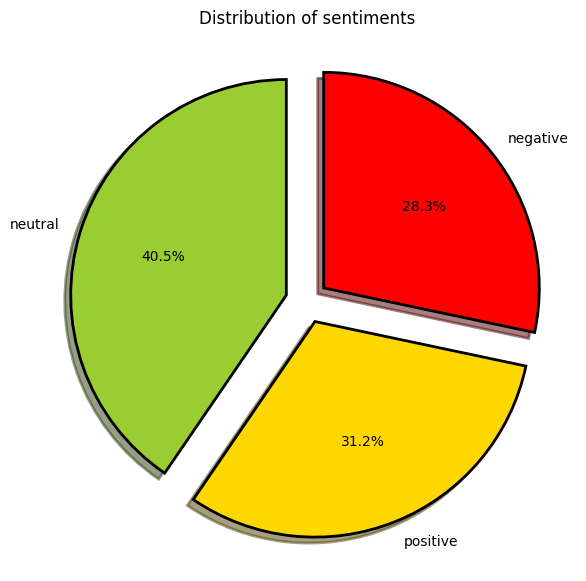

In [4]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [6]:
X = data['selected_text'].values.astype('U')
y = data['sentiment'].values.astype('U')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [7]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True,
                                                     stop_words = 'english',
                                                    analyzer = 'word')),
                 
                 ('logistic', LogisticRegression())])


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe.fit(list(X_train), list(y_train))
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
pipe['logistic']


[[1533  219   79]
 [ 698 2924  492]
 [ 103  193 2004]]
0.7836264402668284


LogisticRegression()

<Axes: >

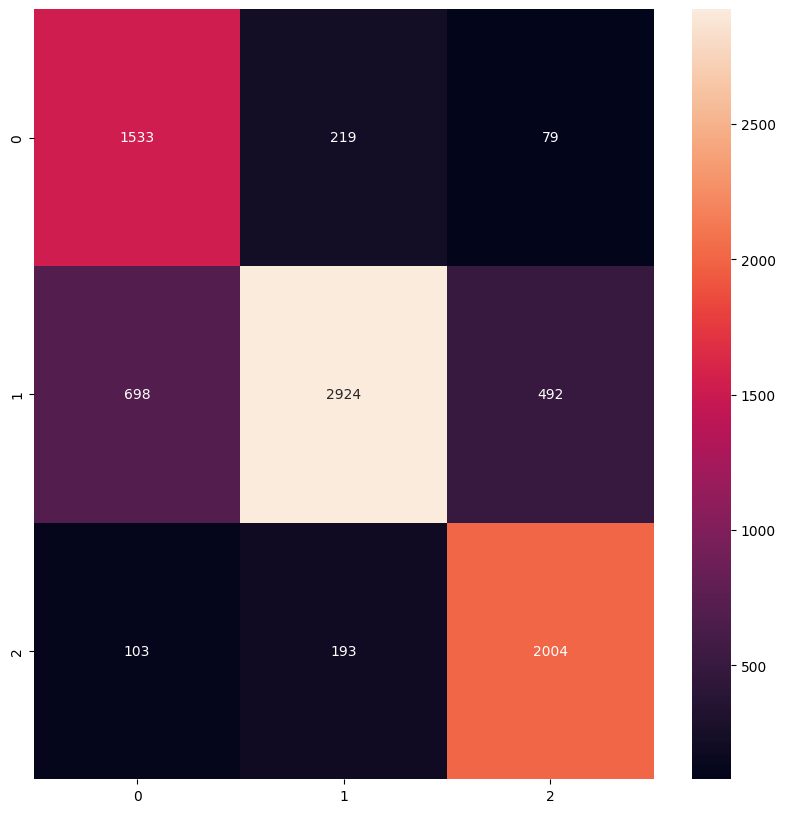

In [8]:
#plot the confusion matrix
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")


In [9]:
#classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1831
           1       0.88      0.71      0.78      4114
           2       0.78      0.87      0.82      2300

    accuracy                           0.78      8245
   macro avg       0.77      0.81      0.78      8245
weighted avg       0.80      0.78      0.78      8245

